# IMPORT LIBRARY

In [ ]:
import pandas as pd
import numpy as np
from sklearn_pandas import CategoricalImputer
import matplotlib.pyplot as plt
import seaborn as sns

# delete outlier
from sklearn.neighbors import LocalOutlierFactor

# processing data
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn import preprocessing

# Compare Algorithms
from sklearn import model_selection

# tuning parameter
from sklearn.model_selection import GridSearchCV

# IMPORT FILE

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/gdrive/MyDrive/essex_university/clustering_bee/Train.csv")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [ ]:
del df['ID']
del df['Var_1']

temp y actual

In [ ]:
df['Ever_Married'].unique(),df['Graduated'].unique(),df['Profession'].unique(),df['Gender'].unique()



(array(['No', 'Yes', nan], dtype=object),
 array(['No', 'Yes', nan], dtype=object),
 array(['Healthcare', 'Engineer', 'Lawyer', 'Entertainment', 'Artist',
        'Executive', 'Doctor', 'Homemaker', 'Marketing', nan], dtype=object),
 array(['Male', 'Female'], dtype=object))

# CLEAN DATA

In [ ]:
 
# handling NaN Categorical values
imputer = CategoricalImputer()
list_feature_dummy = ['Ever_Married','Graduated','Profession','Gender']
# list_feature_dummy = ['Ever_Married','Graduated','Profession','Gender']

for i in range(len(list_feature_dummy)):
  data_numpy = np.array(df[[f'{list_feature_dummy[i]}']], dtype=object)
  predict_categorical = imputer.fit_transform(data_numpy)
  list_answer_predict = [x for sublist in predict_categorical for x in sublist]
  df[f'{list_feature_dummy[i]}'] = list_answer_predict
df.info()
df


# นักดนตรี,ครู,ทหาร
# 0 0 1
# 1 0 0

# data_numpy == [[no],[yes],[nan]]
# predict_categorical == [[no],[yes],[no]]
# list_answer_predict == [no,yes,no]
# df['Ever_Married'] = list_answer_predict

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           8068 non-null   object 
 1   Ever_Married     8068 non-null   object 
 2   Age              8068 non-null   int64  
 3   Graduated        8068 non-null   object 
 4   Profession       8068 non-null   object 
 5   Work_Experience  7239 non-null   float64
 6   Spending_Score   8068 non-null   object 
 7   Family_Size      7733 non-null   float64
 8   Segmentation     8068 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 567.4+ KB


,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Segmentation
0,Male,No,22,No,Healthcare,1.0,Low,4.0,D
1,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,A
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,B
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,B
4,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,A
...,...,...,...,...,...,...,...,...,...
8063,Male,No,22,No,Artist,0.0,Low,7.0,D
8064,Male,No,35,No,Executive,3.0,Low,4.0,D
8065,Female,No,33,Yes,Healthcare,1.0,Low,1.0,D
8066,Female,No,27,Yes,Healthcare,1.0,Low,4.0,B


In [ ]:
df = df.fillna(df.groupby(['Gender','Ever_Married','Graduated','Profession','Spending_Score']).transform('mean'))
df.info()
df.head()
# 'Gender','Ever_Married','Age','Graduated','Profession','Spending_Score'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           8068 non-null   object 
 1   Ever_Married     8068 non-null   object 
 2   Age              8068 non-null   int64  
 3   Graduated        8068 non-null   object 
 4   Profession       8068 non-null   object 
 5   Work_Experience  8068 non-null   float64
 6   Spending_Score   8068 non-null   object 
 7   Family_Size      8068 non-null   float64
 8   Segmentation     8068 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 567.4+ KB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.transform is deprecated. In a future version, a TypeError will be raised. Before calling .transform, select only columns which should be valid for the transforming function.
  """Entry point for launching an IPython kernel.


,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Segmentation
0,Male,No,22,No,Healthcare,1.000000,Low,4.0,D
1,Female,Yes,38,Yes,Engineer,2.183333,Average,3.0,A
2,Female,Yes,67,Yes,Engineer,1.000000,Low,1.0,B
3,Male,Yes,67,Yes,Lawyer,0.000000,High,2.0,B
4,Female,Yes,40,Yes,Entertainment,1.600000,High,6.0,A


In [ ]:

# # 1) Quantitative variable which can be measured such as weight, height ==> have to inplace value ==> Spending_Score ==> high,low,
# # 2) Qualitative variable which can not be measuredเช่น Occupation, gender ==> use get dummy ==> Ever_Married,Graduated,Profession,Var_1,Gender
# # replace data
df = df.replace({'Spending_Score': {'Low': 0, 'Average': 1, 'High':2},
                'Segmentation':{'A': 0, 'B': 1, 'C':2,'D':3}
})

df = pd.get_dummies(df, columns=['Ever_Married','Graduated','Profession','Gender'])

df.info()
print("Dimension:",df.shape)
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       8068 non-null   int64  
 1   Work_Experience           8068 non-null   float64
 2   Spending_Score            8068 non-null   int64  
 3   Family_Size               8068 non-null   float64
 4   Segmentation              8068 non-null   int64  
 5   Ever_Married_No           8068 non-null   uint8  
 6   Ever_Married_Yes          8068 non-null   uint8  
 7   Graduated_No              8068 non-null   uint8  
 8   Graduated_Yes             8068 non-null   uint8  
 9   Profession_Artist         8068 non-null   uint8  
 10  Profession_Doctor         8068 non-null   uint8  
 11  Profession_Engineer       8068 non-null   uint8  
 12  Profession_Entertainment  8068 non-null   uint8  
 13  Profession_Executive      8068 non-null   uint8  
 14  Professi

,Age,Work_Experience,Spending_Score,Family_Size,Segmentation,Ever_Married_No,Ever_Married_Yes,Graduated_No,Graduated_Yes,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Gender_Female,Gender_Male
0,22,1.000000,0,4.0,3,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1
1,38,2.183333,1,3.0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0
2,67,1.000000,0,1.0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0
3,67,0.000000,2,2.0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1
4,40,1.600000,2,6.0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0


# Exploratory Data Analysis

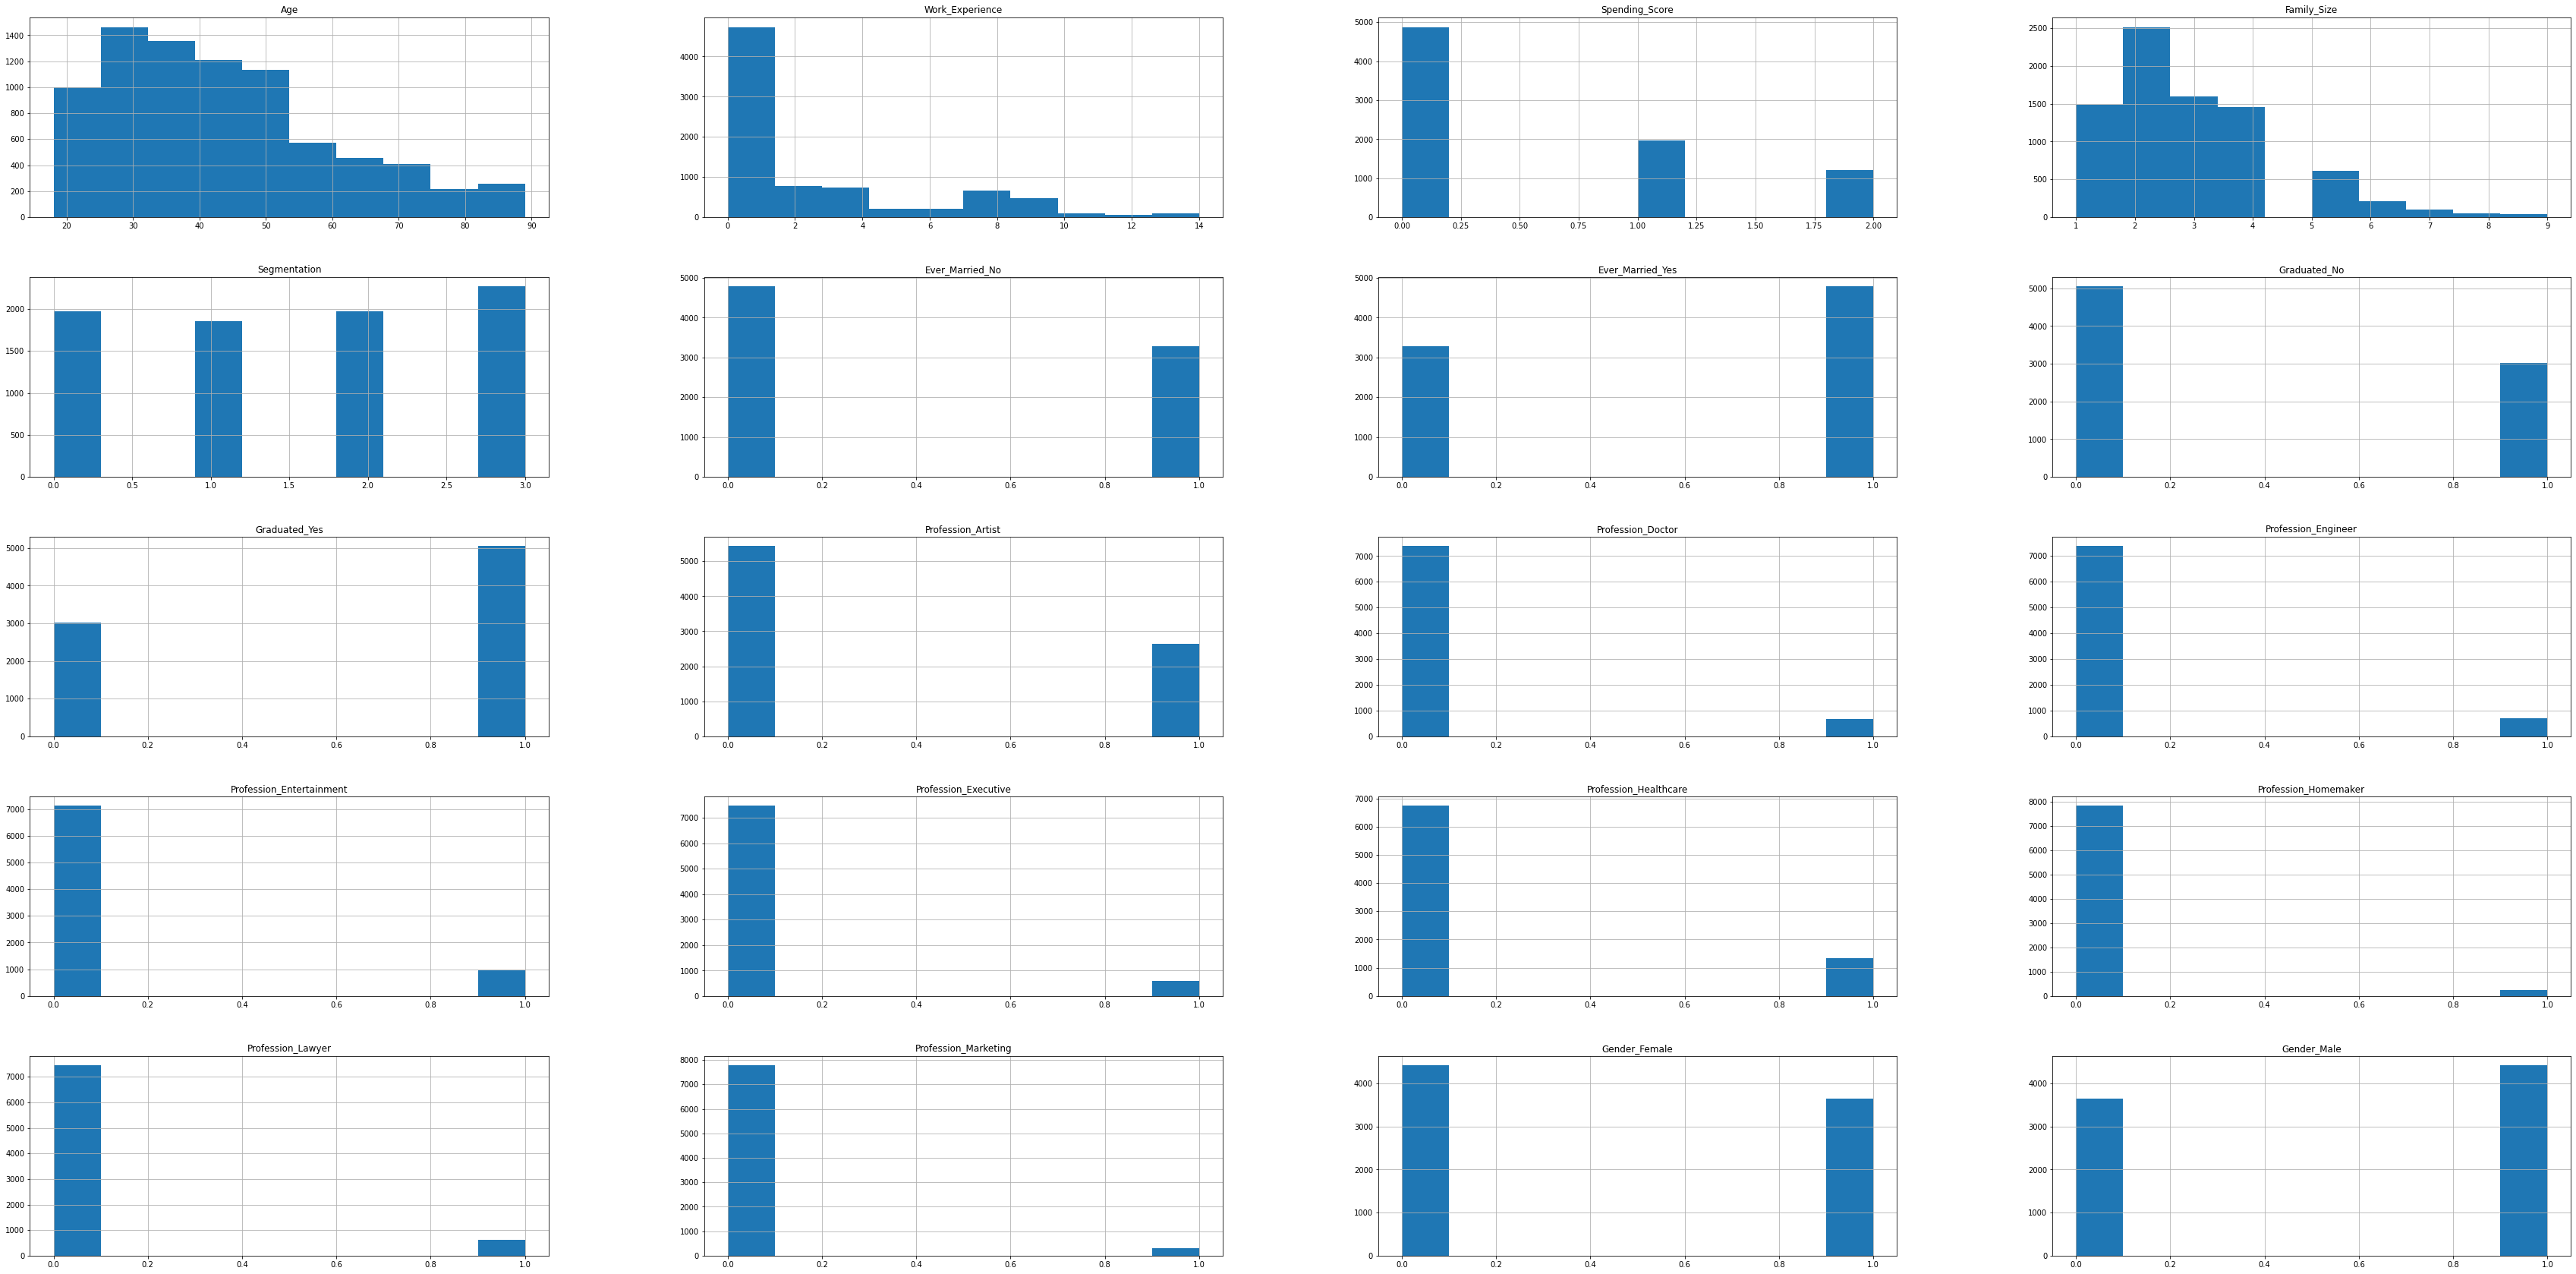

In [ ]:
df.hist(figsize = (60,30))
plt.show()    

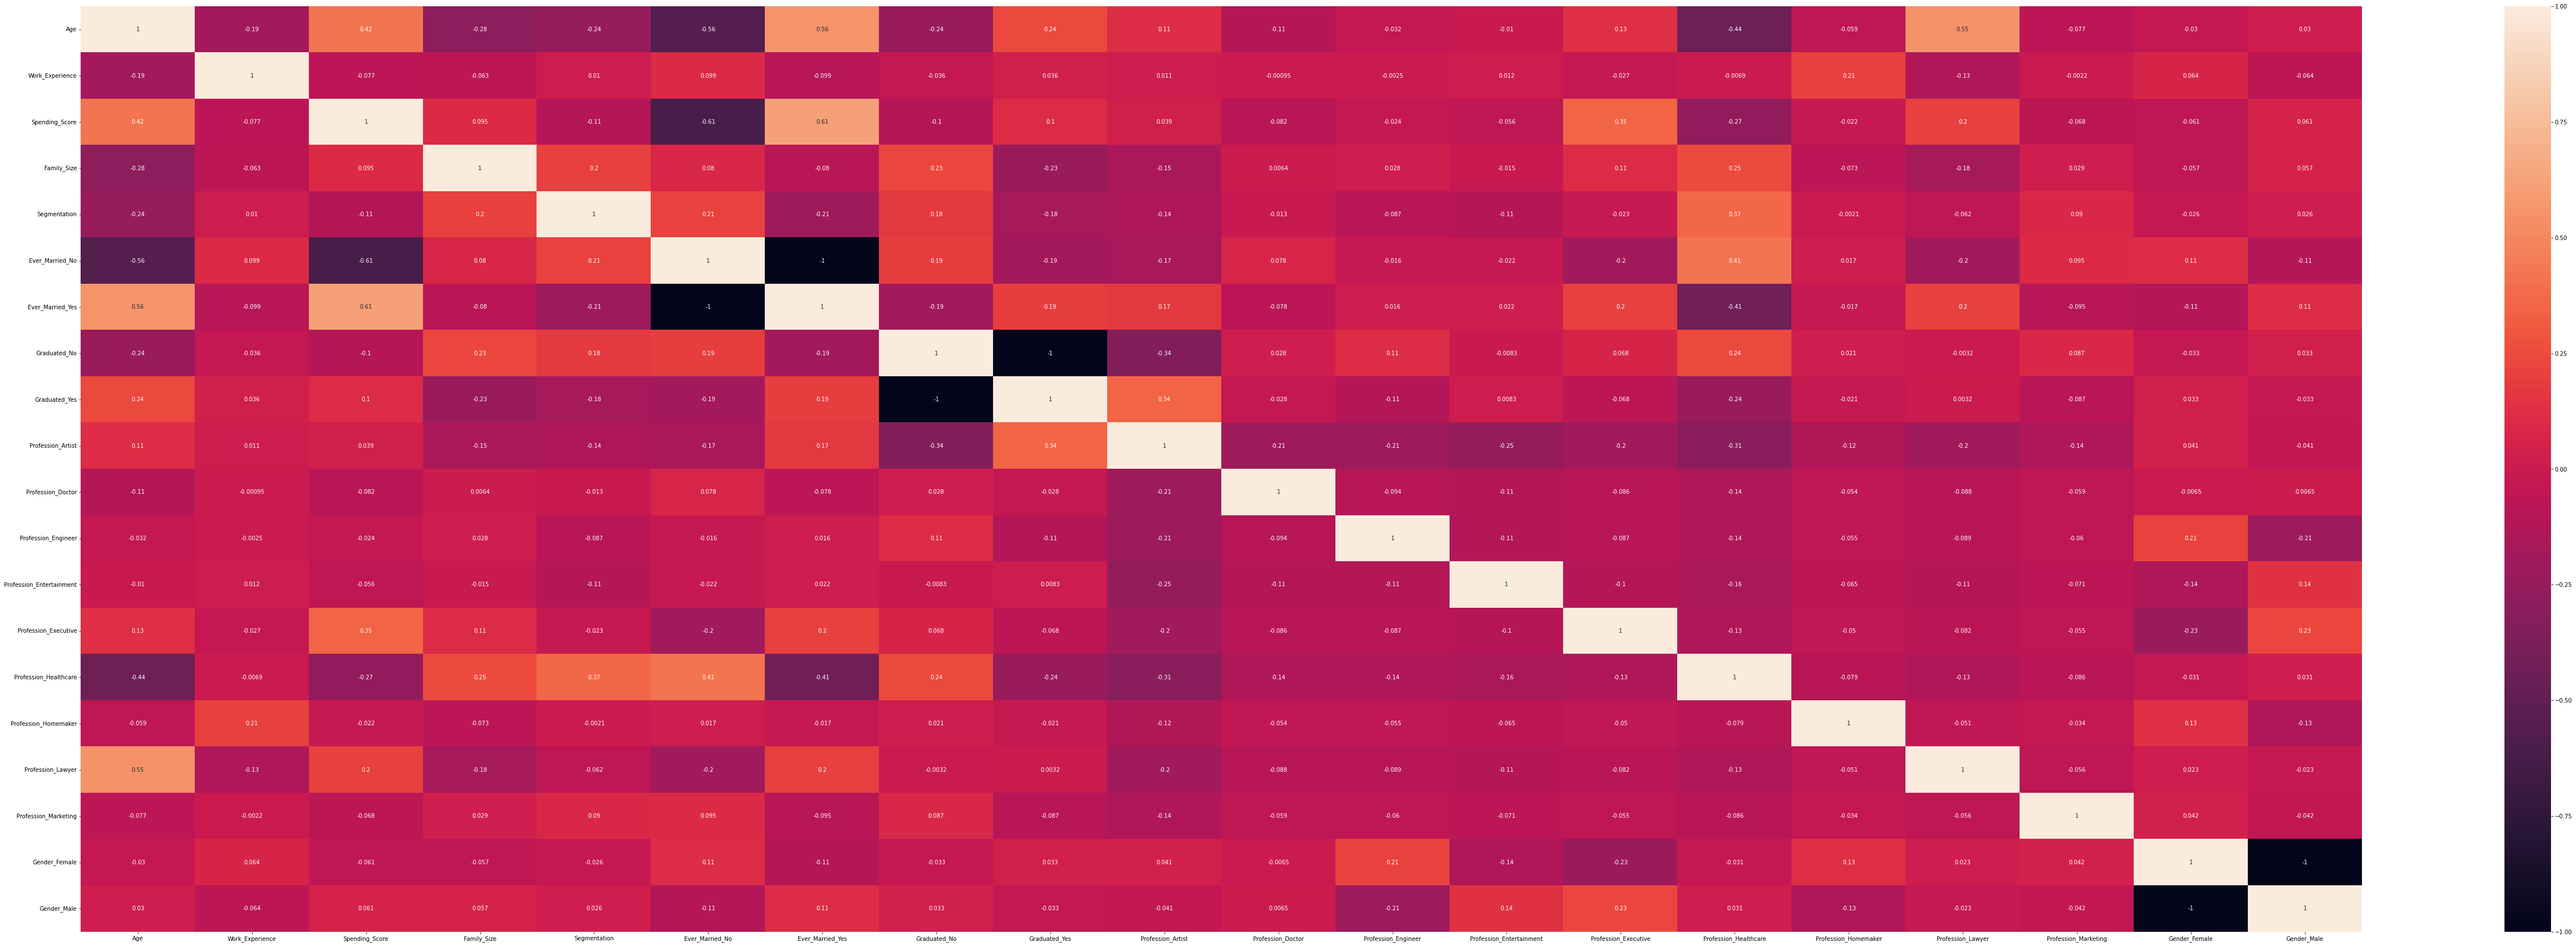

In [ ]:
plt.figure(figsize = (90,30))
df_corr = df.corr()
sns.heatmap(df_corr,xticklabels=df_corr.columns,yticklabels=df_corr.columns,annot=True)
# print(plant_corr)

In [ ]:
df_columns = df_corr.columns.tolist()
for i in range(len(df_columns)):
  correlation_columns = df_corr[f'{df_corr.columns[i]}']
  
  for j in range(len(df_columns)):
    correleation_row = correlation_columns[j]
    # if df_columns[i] == 'Spending_Score' or df_columns[j] == 'Spending_Score':
    if (correleation_row < 1 and correleation_row > 0.8) or (correleation_row > -1 and correleation_row < -0.5):
    # if (correleation_row < 0.1 and correleation_row > -0.1):
      print(df_columns[i],df_columns[j],correleation_row)

Age Ever_Married_No -0.556892164548711
Spending_Score Ever_Married_No -0.6106419359150816
Ever_Married_No Age -0.556892164548711
Ever_Married_No Spending_Score -0.6106419359150816
Gender_Female Gender_Male -0.9999999999999999
Gender_Male Gender_Female -0.9999999999999999


In [ ]:
df.describe()

,Age,Work_Experience,Spending_Score,Family_Size,Segmentation,Ever_Married_No,Ever_Married_Yes,Graduated_No,Graduated_Yes,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Gender_Female,Gender_Male
count,8068.000000,8068.000000,8068.000000,8068.000000,8068.000000,8068.000000,8068.000000,8068.000000,8068.000000,8068.000000,8068.000000,8068.000000,8068.000000,8068.000000,8068.000000,8068.000000,8068.000000,8068.000000,8068.000000,8068.000000
mean,43.466906,2.639201,0.546108,2.845696,1.561973,0.407164,0.592836,0.374566,0.625434,0.327219,0.085275,0.086639,0.117625,0.074244,0.165097,0.030491,0.077219,0.036192,0.452529,0.547471
std,16.711696,3.249013,0.741202,1.508010,1.139029,0.491336,0.491336,0.484041,0.484041,0.469227,0.279308,0.281322,0.322184,0.262184,0.371291,0.171944,0.266955,0.186780,0.497772,0.497772
min,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,40.000000,1.000000,0.000000,2.830144,2.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,53.000000,4.000000,1.000000,4.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,89.000000,14.000000,2.000000,9.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


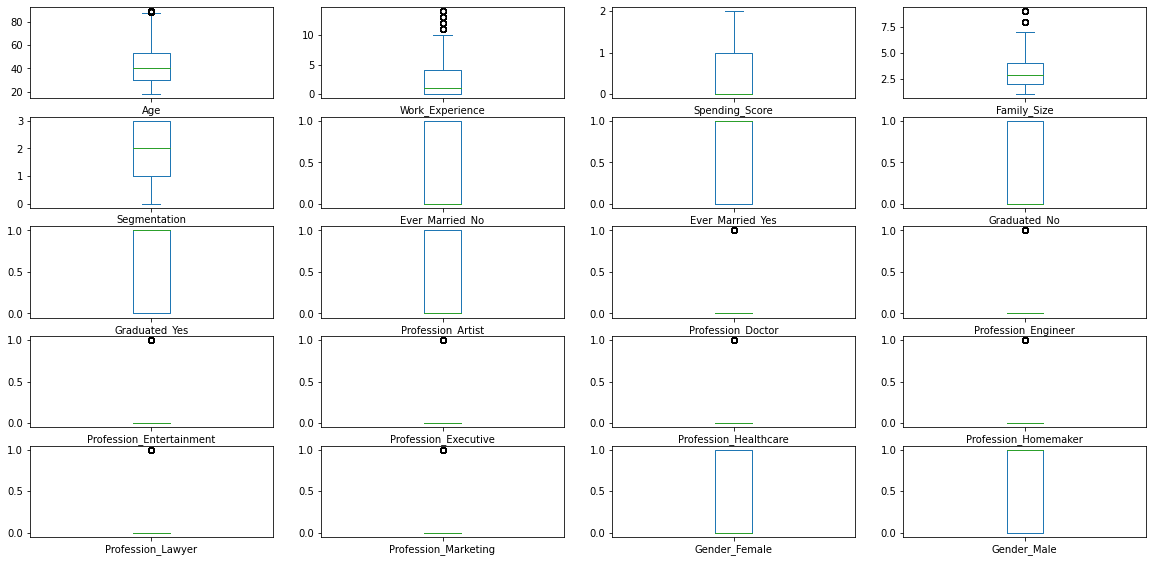

In [ ]:
df.plot(kind='box', subplots=True, figsize=(20, 40),layout=(20,4))
plt.show()

# Feature Engineering

In [ ]:
OutlierFactor = LocalOutlierFactor()
predict_outlier = OutlierFactor.fit_predict(df)
print(predict_outlier)
df['check_outlier'] = predict_outlier.tolist()
df = df[df['check_outlier'] == 1].reset_index(drop=True).drop(['check_outlier'], axis=1)
df

# predict_outlier = [0,1,1]
# df['check_outlier'] = predict_outlier


[1 1 1 ... 1 1 1]


,Age,Work_Experience,Spending_Score,Family_Size,Segmentation,Ever_Married_No,Ever_Married_Yes,Graduated_No,Graduated_Yes,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Gender_Female,Gender_Male
0,22,1.000000,0,4.0,3,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1
1,38,2.183333,1,3.0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0
2,67,1.000000,0,1.0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0
3,67,0.000000,2,2.0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1
4,40,1.600000,2,6.0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7974,22,0.000000,0,7.0,3,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1
7975,35,3.000000,0,4.0,3,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1
7976,33,1.000000,0,1.0,3,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0
7977,27,1.000000,0,4.0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0


In [ ]:

y_actual = df['Segmentation'].tolist()
del df['Segmentation']

# train_model

In [ ]:
standard_scaler = preprocessing.StandardScaler()
# X = df.drop(["ID"], axis=1,inplace=False).to_numpy()
X = df.to_numpy()
X_scalar = standard_scaler.fit_transform(X)

print(X_scalar.shape)
# 21,26,100
# 0.21,0.26,1

(7979, 19)


Text(0.5, 1.0, 'standard_fit_transform')

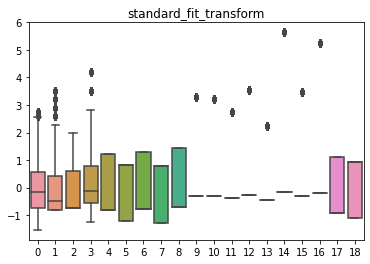

In [ ]:
sns.boxplot(data=X_scalar)
plt.title('standard_fit_transform')

# PCA for reduce dimension

In [ ]:
# from sklearn.decomposition import PCA
# pca = decomposition.PCA().fit(X_scalar)


from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state= 200)


pca.fit(X_scalar)


PCA(n_components=2, random_state=200)

In [ ]:
scores_pca = pca.transform(X_scalar)
scores_pca

array([[ 3.25763893,  1.9702157 ],
       [-0.84570152, -1.50235504],
       [-1.29508789, -1.94897093],
       ...,
       [ 1.98366364, -1.82078737],
       [ 2.41352053, -1.38376784],
       [-1.80171906,  1.91010608]])

# train multiple model by default parameter

In [ ]:
# from sklearn.cluster import KMeans
# km = KMeans(n_clusters=4)
# y_predicted = km.fit_predict(scores_pca)
# y_predicted

In [ ]:
# # list(set(y_actual))

# df_compare = pd.DataFrame({'Actual':y_actual,'predict':y_predicted})
# df_compare

In [ ]:
# df_compare[df_compare['Actual'] == df_compare['predict']]

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import Birch
from sklearn.cluster import DBSCAN
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import MeanShift
from sklearn.cluster import OPTICS
from sklearn.cluster import SpectralClustering
from sklearn import metrics


hc = AgglomerativeClustering(n_clusters = 4,affinity = 'euclidean',linkage = 'ward')
km = KMeans(n_clusters=4,random_state=200)
bir = Birch(n_clusters=4)
mini_batch_kmeans = MiniBatchKMeans(n_clusters=4,random_state=200)
spectral_clustering = SpectralClustering(n_clusters=4,random_state=100)

list_model = [hc,km,bir,mini_batch_kmeans,spectral_clustering]
list_accuracy = []
list_rand_score = []
list_adjusted_rand_score = []
list_model_name = []
list_ami = []
list_homogenity = []
list_completeness = []
list_v_measure = []
list_silhouette = []

for model in list_model:
  y_predicted = model.fit_predict(scores_pca)
  print(model)
  list_model_name.append(model)
  # print(y_predicted)
  df_compare = pd.DataFrame({'Actual':y_actual,'predict':y_predicted})

  length_correct = len(df_compare[df_compare['Actual'] == df_compare['predict']])
  list_accuracy.append(length_correct/len(df_compare))
 
  list_rand_score.append(metrics.rand_score(y_predicted, y_actual))

  list_adjusted_rand_score.append(metrics.adjusted_rand_score(y_predicted, y_actual))

  list_ami.append(metrics.adjusted_mutual_info_score(y_predicted, y_actual,average_method='arithmetic'))
  list_homogenity.append(metrics.homogeneity_score(y_predicted, y_actual))
  list_completeness.append(metrics.completeness_score(y_predicted, y_actual))
  list_v_measure.append(metrics.v_measure_score(y_predicted, y_actual))
df_check_metrics = pd.DataFrame({
    'model':list_model_name,
    'accuracy':list_accuracy,
    'rand_score':list_rand_score,
    'adjusted_rand_score':list_adjusted_rand_score,
    'adjusted_mutual_info_score':list_ami,
    'homogeneity_score':list_homogenity,
    'completeness_score':list_completeness,
    'v_measure_score':list_v_measure,
})
df_check_metrics


AgglomerativeClustering(n_clusters=4)
KMeans(n_clusters=4, random_state=200)
Birch(n_clusters=4)
MiniBatchKMeans(n_clusters=4, random_state=200)
SpectralClustering(n_clusters=4, random_state=100)


,model,accuracy,rand_score,adjusted_rand_score,adjusted_mutual_info_score,homogeneity_score,completeness_score,v_measure_score
0,AgglomerativeClustering(n_clusters=4),0.328989,0.633714,0.083454,0.102105,0.106643,0.098640,0.102485
1,"KMeans(n_clusters=4, random_state=200)",0.395914,0.660555,0.106656,0.115201,0.116200,0.114934,0.115563
2,Birch(n_clusters=4),0.353302,0.639956,0.076361,0.103389,0.105880,0.101727,0.103762
3,"MiniBatchKMeans(n_clusters=4, random_state=200)",0.397920,0.661599,0.106505,0.115135,0.115934,0.115063,0.115497
4,"SpectralClustering(n_clusters=4, random_state=...",0.361198,0.622267,0.061528,0.095099,0.099804,0.091522,0.095484


In [ ]:
# df_compare[df_compare['Actual'] == df_compare['predict']]

In [ ]:
# from sklearn import metrics
# a = metrics.rand_score(y_predicted, y_actual)

# b = metrics.adjusted_rand_score(y_predicted, y_actual)
# print(a,b)

# tuning parameter

In [ ]:
# MODEL

# linear_reg = LinearRegression()

km = KMeans(n_clusters=4,random_state=200)



param_grid = { 
    'max_iter': [300,600,900,1200],
    # 'normalize': normalize,
    # 'copy_X' : copy_X,
    # 'n_jobs' : n_jobs,
    # 'positive' : positive
}
# scores_pca
CV_lr = GridSearchCV(estimator=km, param_grid=param_grid, cv= 5)
CV_lr.fit(scores_pca)

GridSearchCV(cv=5, estimator=KMeans(n_clusters=4, random_state=200),
             param_grid={'max_iter': [300, 600, 900, 1200]})

In [ ]:
CV_lr.best_params_

{'max_iter': 300}

In [ ]:
# hc = AgglomerativeClustering(n_clusters = 4,affinity = 'euclidean',linkage = 'ward')
hc = AgglomerativeClustering(n_clusters = 4,affinity = 'euclidean')

km = KMeans(n_clusters=4,random_state=200)
bir = Birch(n_clusters=4)
mini_batch_kmeans = MiniBatchKMeans(n_clusters=4,random_state=200)
spectral_clustering = SpectralClustering(n_clusters=4,random_state=100)

# all model and tuning parameter
model_params = {
    'KMeans': {
        'model': KMeans(n_clusters=4,random_state=200),
        'params' : {
            'max_iter': [300,600,900,1200],
            'init':['k-means++','random'],
            'n_init':[10,40],
            'algorithm':['auto','full','elkan'],
        }  
    },
    'AgglomerativeClustering': {
        'model': AgglomerativeClustering(n_clusters = 4,affinity = 'euclidean'),
        'params' : {
            'linkage': ['ward','complete','average','single'],
            'compute_distances': [True,False]
        }
    },
    'Birch': {
        'model': Birch(n_clusters=4),
        'params' : {
            'threshold': [0.3,0.5,0.8],
            'branching_factor': 50,
            'compute_labels': [True,False],
        }
    },
    'MiniBatchKMeans': {
        'model': MiniBatchKMeans(n_clusters=4,random_state=200),
        'params' : {
            'init': ['k-means++','random'],
            'max_iter': [300,600,900,1200],
            'compute_labels': [True,False],
            'n_init':[3,10],
        }
    },
    'SpectralClustering': {
        'model': SpectralClustering(n_clusters=4,random_state=100),
        'params' : {
            'eigen_solver': ['arpack','lobpcg','amg'],
            'n_init':[10,40],
            'affinity':['nearest_neighbors','rbf','precomputed','precomputed_nearest_neighbors'],
            'assign_labels':['kmeans','discretize']
        }
    }
}


scores = []

for model_name, mp in model_params.items():  
  try:

    print(mp['model'], mp['params'])
    # use RandomizedSearchCV instead GridSearchCV because it is fast
    random_search = GridSearchCV(
      estimator = mp['model'],
      param_grid= mp['params'],
      cv=5,
    )

    random_search.fit(scores_pca)
    scores.append({
        'model': model_name,
        # 'best_score': random_search.best_score_,
        'best_params': random_search.best_params_,
        'best_estimator':random_search.best_estimator_
    })
  except:
    pass
# show accuracy, best_parameter and best_estimator in each model
# df_random_search_cv = pd.DataFrame(scores,columns=['model','best_score','best_params','best_estimator'])
df_random_search_cv = pd.DataFrame(scores,columns=['model','best_params','best_estimator'])

df_random_search_cv



KMeans(n_clusters=4, random_state=200) {'max_iter': [300, 600, 900, 1200], 'init': ['k-means++', 'random'], 'n_init': [10, 40], 'algorithm': ['auto', 'full', 'elkan']}
AgglomerativeClustering(n_clusters=4) {'linkage': ['ward', 'complete', 'average', 'single'], 'compute_distances': [True, False]}
Birch(n_clusters=4) {'threshold': [0.3, 0.5, 0.8], 'branching_factor': 50, 'compute_labels': [True, False]}
MiniBatchKMeans(n_clusters=4, random_state=200) {'init': ['k-means++', 'random'], 'max_iter': [300, 600, 900, 1200], 'compute_labels': [True, False], 'n_init': [3, 10]}
SpectralClustering(n_clusters=4, random_state=100) {'eigen_solver': ['arpack', 'lobpcg', 'amg'], 'n_init': [10, 40], 'affinity': ['nearest_neighbors', 'rbf', 'precomputed', 'precomputed_nearest_neighbors'], 'assign_labels': ['kmeans', 'discretize']}


,model,best_params,best_estimator
0,KMeans,"{'algorithm': 'auto', 'init': 'random', 'max_i...","KMeans(init='random', n_clusters=4, random_sta..."
1,MiniBatchKMeans,"{'compute_labels': True, 'init': 'k-means++', ...","MiniBatchKMeans(max_iter=300, n_clusters=4, ra..."


# Train multiple model by tuning parameter

In [ ]:
from sklearn import metrics


hc = AgglomerativeClustering(n_clusters = 4,affinity = 'euclidean',linkage = 'ward')
km = KMeans(n_clusters=4,random_state=200)
bir = Birch(n_clusters=4)
mini_batch_kmeans = MiniBatchKMeans(n_clusters=4,random_state=200,compute_labels=True,init='k-means++',max_iter=300,n_init=3)
spectral_clustering = SpectralClustering(n_clusters=4,random_state=100)

list_model = [hc,km,bir,mini_batch_kmeans,spectral_clustering]
list_accuracy = []
list_rand_score = []
list_adjusted_rand_score = []
list_model_name = []
list_ami = []
list_homogenity = []
list_completeness = []
list_v_measure = []
list_silhouette = []

for model in list_model:
  y_predicted = model.fit_predict(scores_pca)
  print(model)
  list_model_name.append(model)
  # print(y_predicted)
  df_compare = pd.DataFrame({'Actual':y_actual,'predict':y_predicted})

  length_correct = len(df_compare[df_compare['Actual'] == df_compare['predict']])
  list_accuracy.append(length_correct/len(df_compare))
 
  list_rand_score.append(metrics.rand_score(y_predicted, y_actual))

  list_adjusted_rand_score.append(metrics.adjusted_rand_score(y_predicted, y_actual))

  list_ami.append(metrics.adjusted_mutual_info_score(y_predicted, y_actual,average_method='arithmetic'))
  list_homogenity.append(metrics.homogeneity_score(y_predicted, y_actual))
  list_completeness.append(metrics.completeness_score(y_predicted, y_actual))
  list_v_measure.append(metrics.v_measure_score(y_predicted, y_actual))
df_check_metrics = pd.DataFrame({
    'model':list_model_name,
    'accuracy':list_accuracy,
    'rand_score':list_rand_score,
    'adjusted_rand_score':list_adjusted_rand_score,
    'adjusted_mutual_info_score':list_ami,
    'homogeneity_score':list_homogenity,
    'completeness_score':list_completeness,
    'v_measure_score':list_v_measure,
})
df_check_metrics


AgglomerativeClustering(n_clusters=4)
KMeans(n_clusters=4, random_state=200)
Birch(n_clusters=4)
MiniBatchKMeans(max_iter=300, n_clusters=4, random_state=200)
SpectralClustering(n_clusters=4, random_state=100)


,model,accuracy,rand_score,adjusted_rand_score,adjusted_mutual_info_score,homogeneity_score,completeness_score,v_measure_score
0,AgglomerativeClustering(n_clusters=4),0.328989,0.633714,0.083454,0.102105,0.106643,0.098640,0.102485
1,"KMeans(n_clusters=4, random_state=200)",0.395914,0.660555,0.106656,0.115201,0.116200,0.114934,0.115563
2,Birch(n_clusters=4),0.353302,0.639956,0.076361,0.103389,0.105880,0.101727,0.103762
3,"MiniBatchKMeans(max_iter=300, n_clusters=4, ra...",0.397920,0.661599,0.106505,0.115135,0.115934,0.115063,0.115497
4,"SpectralClustering(n_clusters=4, random_state=...",0.361198,0.622267,0.061528,0.095099,0.099804,0.091522,0.095484


In [ ]:
from sklearn.cluster import KMeans
best_model = MiniBatchKMeans(n_clusters=4,random_state=200,compute_labels=True,init='k-means++',max_iter=300,n_init=3)
y_predicted = best_model.fit_predict(scores_pca)
y_predicted


array([3, 2, 2, ..., 1, 1, 0], dtype=int32)

In [ ]:
df_compare = pd.DataFrame({'Actual':y_actual,'predict':y_predicted})
df_compare

,Actual,predict
0,3,3
1,0,2
2,1,2
3,1,0
4,0,2
...,...,...
7974,3,3
7975,3,3
7976,3,1
7977,1,1


In [ ]:
length_correct = len(df_compare[df_compare['Actual'] == df_compare['predict']])
length_correct

3175

visualization predictive

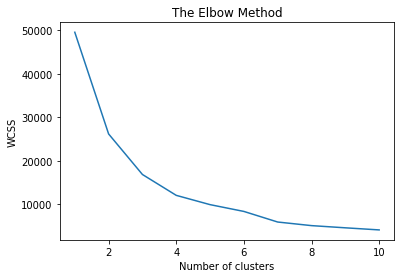

In [ ]:
wcss = []
for i in range(1, 11):
    best_model = MiniBatchKMeans(n_clusters=i,random_state=200,compute_labels=True,init='k-means++',max_iter=300,n_init=3)
    # kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    best_model.fit(scores_pca)
    wcss.append(best_model.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

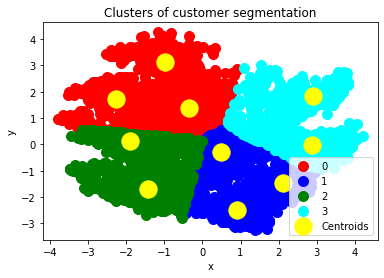

In [ ]:
# .cluster_centers_ คือตำแหน่งของจุดเซนทรอยด์ที่ได้มา จะมีขนาดเท่ากับ (จำนวนเซนทรอยด์,จำนวนมิติ)

# .labels_ ผลการแบ่งกลุ่มของข้อมูลที่ใช้เรียนรู้

# .inertia_ คือค่าผลรวมความคลาดเคลื่อนกำลังสอง (SSE) ของการแบ่งกลุ่ม

plt.scatter(scores_pca[y_predicted == 0, 0], scores_pca[y_predicted == 0, 1], s = 100, c = 'red', label = '0')
plt.scatter(scores_pca[y_predicted == 1, 0], scores_pca[y_predicted == 1, 1], s = 100, c = 'blue', label = '1')
plt.scatter(scores_pca[y_predicted == 2, 0], scores_pca[y_predicted == 2, 1], s = 100, c = 'green', label = '2')
plt.scatter(scores_pca[y_predicted == 3, 0], scores_pca[y_predicted == 3, 1], s = 100, c = 'cyan', label = '3')
# plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Sensible')
plt.scatter(best_model.cluster_centers_[:, 0], best_model.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customer segmentation')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [ ]:
best_model.cluster_centers_.shape

(10, 2)

In [ ]:
best_model.cluster_centers_

array([[ 2.89644028,  1.82525119],
       [ 0.47717349, -0.29365771],
       [-1.90645043,  0.11796172],
       [ 0.91618587, -2.48448477],
       [-2.26391524,  1.71879889],
       [ 2.87266793, -0.01611348],
       [-1.44604038, -1.70004122],
       [-0.35616761,  1.3822191 ],
       [-0.98072336,  3.12249523],
       [ 2.11719984, -1.47596934]])

In [ ]:
# df_full_clean = pd.DataFrame({'Actual':y_actual,'predict':y_predicted})
# df_full_clean
df['Actual'] = y_actual
df['predict'] = y_predicted
df


,Age,Work_Experience,Spending_Score,Family_Size,Ever_Married_No,Ever_Married_Yes,Graduated_No,Graduated_Yes,Profession_Artist,Profession_Doctor,...,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Gender_Female,Gender_Male,Actual,predict
0,22,1.000000,0,4.0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,1,3,3
1,38,2.183333,1,3.0,0,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,2
2,67,1.000000,0,1.0,0,1,0,1,0,0,...,0,0,0,0,0,0,1,0,1,2
3,67,0.000000,2,2.0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,1,1,0
4,40,1.600000,2,6.0,0,1,0,1,0,0,...,1,0,0,0,0,0,1,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7974,22,0.000000,0,7.0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,1,3,3
7975,35,3.000000,0,4.0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,1,3,3
7976,33,1.000000,0,1.0,1,0,0,1,0,0,...,0,0,1,0,0,0,1,0,3,1
7977,27,1.000000,0,4.0,1,0,0,1,0,0,...,0,0,1,0,0,0,1,0,1,1


In [ ]:
# df.to_csv('')